In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [2]:
data = load_breast_cancer()

In [3]:
X = data.data
Y = data.target

In [4]:
X = X[:,:2]

In [5]:
X_train,X_test,Y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
from sklearn.svm import SVC

svm_linear = SVC(kernel='linear',C=1)
svm_linear.fit(X_train,Y_train)

svm_rbf = SVC(kernel='rbf',C=1,gamma=0.5)
svm_rbf.fit(X_train,Y_train)

SVC(C=1, gamma=0.5)

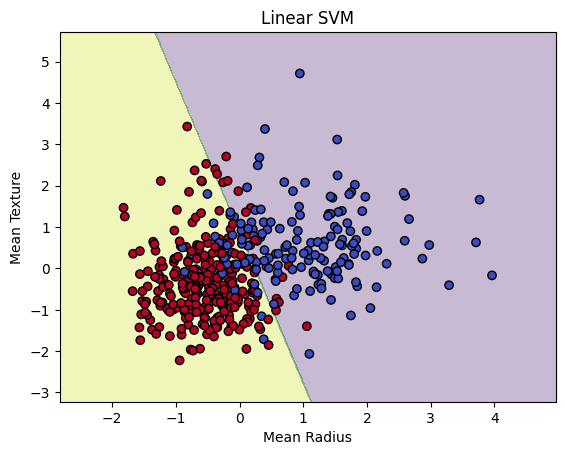

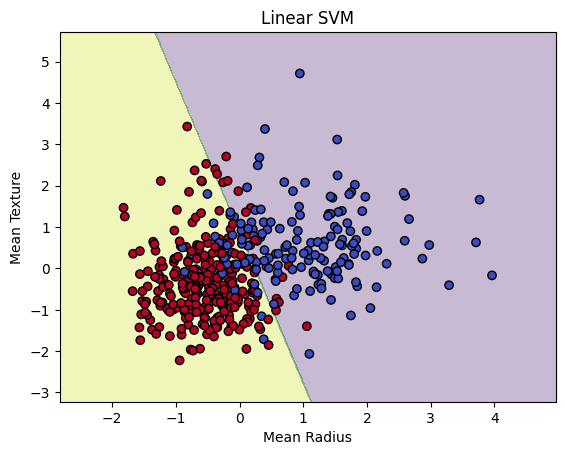

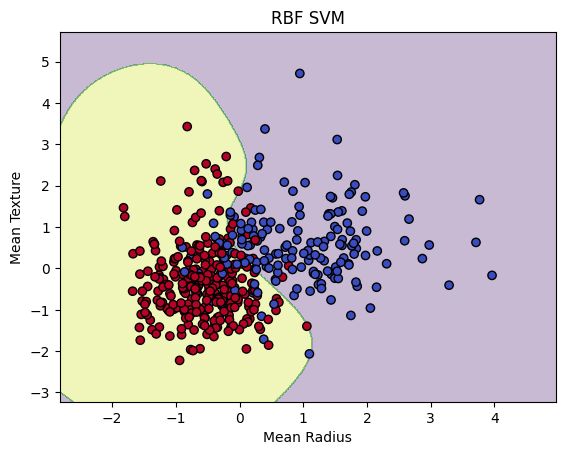

In [9]:
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.title(title)
    plt.xlabel('Mean Radius')
    plt.ylabel('Mean Texture')
    plt.show()

# Plot Linear
plot_decision_boundary(svm_linear, X_train, Y_train, "Linear SVM")
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.title(title)
    plt.xlabel('Mean Radius')
    plt.ylabel('Mean Texture')
    plt.show()

# Plot Linear
plot_decision_boundary(svm_linear, X_train, Y_train, "Linear SVM")

# Plot RBF
plot_decision_boundary(svm_rbf, X_train, Y_train, "RBF SVM")

In [11]:
from sklearn.model_selection import cross_val_score

best_model = grid.best_estimator_
scores = cross_val_score(best_model,X_train,Y_train,cv=5)


print("cross validation accuracy",scores.mean())

cross validation accuracy 0.9010989010989011


In [10]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1,1,10],
    'gamma':[0.1,0.5,1],
    'kernel':['rbf']
}

grid = GridSearchCV(SVC(), param_grid, cv=5)
grid.fit(X_train,Y_train)

print("Best_params:",grid.best_params_)

Best_params: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
